In [40]:
using Statistics, CSV, DataFramesMeta, LinearAlgebra
using Plots
using Optim, EasyFit

using RemoteREPL
@async serve_repl()

Task (failed) @0x0000013a555aa8c0
IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
  [1] uv_error
    @ .\libuv.jl:100 [inlined]
  [2] #listen#13
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:628 [inlined]
  [3] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:627 [inlined]
  [4] #listen#10
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:621 [inlined]
  [5] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:618 [inlined]
  [6] #listen#12
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [7] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [

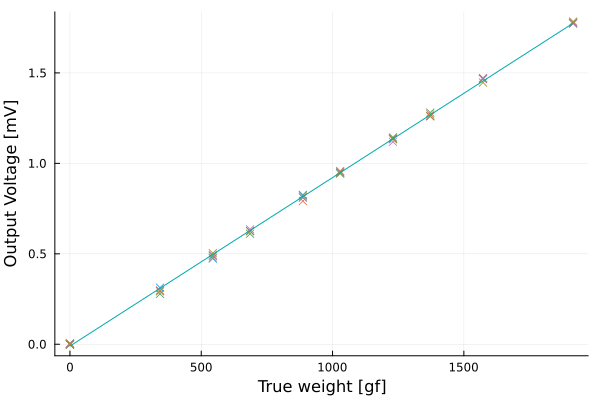

In [52]:
kristmass = 343
appmass = 544

xs = masses = [
    0,
    kristmass,
    2kristmass,
    3kristmass,
    4kristmass,
    4kristmass + appmass,
    3kristmass + appmass,
    2kristmass + appmass,
    kristmass + appmass,
    appmass,
    0
]

data = CSV.read("data00.csv", DataFrame)
scatter(masses,data[:,2])


strs = [string("Data0",i,".csv") for i in 0:4]
dataarr = CSV.read.(strs, DataFrame)
ys = [dataarr[i][:,2] for i in eachindex(dataarr)]; ys=hcat(ys...);
β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True weight [gf]",
    ylabel = "Output Voltage [mV]"
)
plot!(xs, (xs*β_1 .+ β_0))

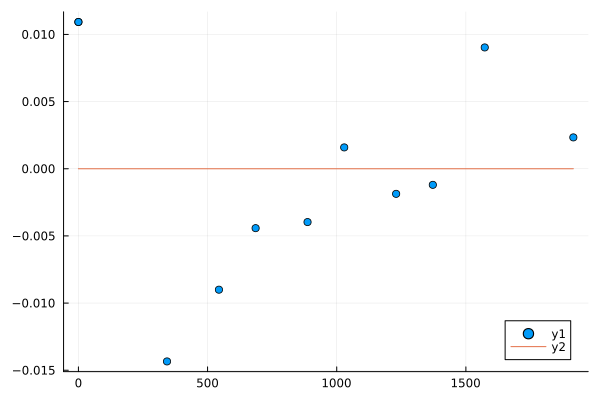

In [42]:
δ = ys .- (xs*β_1 .+ β_0)
# δmean = vcat(sum(δ[1:10,:] + δ[end:-1:12,:],dims=2)/2size(δ)[2], mean(δ[11,:]))
δmean = mean(δ, dims=2)
δxs = xs
δfit = fitlinear(δxs, δmean)

scatter(δxs, δmean)
plot!(δfit.x,δfit.y)

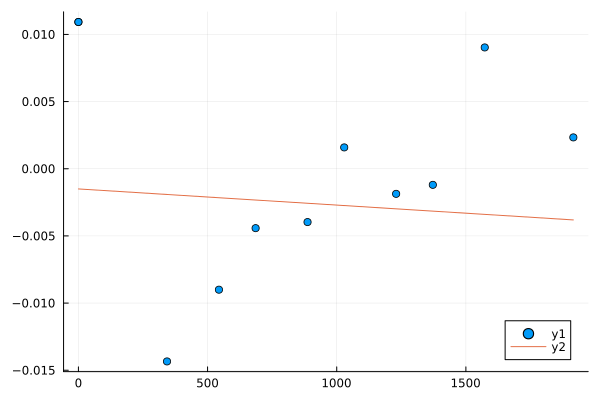

In [43]:
Lmax(y,y_hat) = norm(y-y_hat,Inf)
f(x) = Lmax(δmean, δxs*x[1] .+ x[2])
opt = optimize(f,[δfit.a, δfit.b])
Lfit = Optim.minimizer(opt)
L = Optim.minimum(opt)

scatter(δxs, δmean)
plot!(δxs, δxs*Lfit[1] .+ Lfit[2])

In [57]:
tβ_1 = 1/β_1
tβ_0 = β_0/tβ_1
tβ_1,tβ_0
β_1 + β_0, 506
# tβ_1, tβ_0

(-0.009016270912426062, 506)

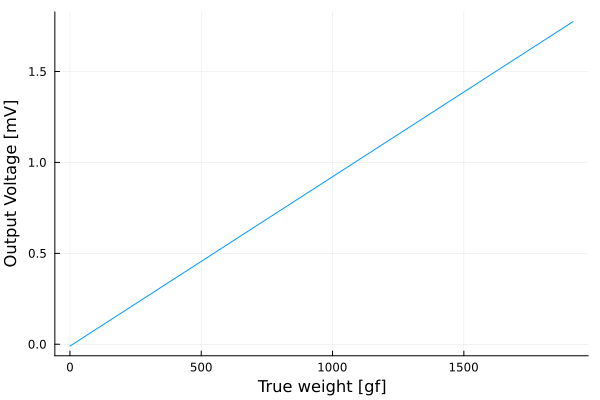

In [54]:
plot(xs, (xs*β_1 .+ β_0), 
    legend =:none,
    xlabel = "True weight [gf]",
    ylabel = "Output Voltage [mV]"
)